# Deconvolving Lensed Images
In this notebook we will describe how to create a set of lensed images from real galaxy images and how to deconvolve them. 

The input of our RIM will be the lensed image and the output will be the unlensed image. 

In [23]:
import autolens as al
import autolens.plot as aplt
import numpy as np
import matplotlib.pyplot as plt

# Step1: Create Mock lensed images
In order to create mock lensed images we must do the following:
 - gather images of galaxies
 - create lensing systems
 - apply lense to galaxy

To do these steps we will be using autoLens (see the following for more information on autoLens: https://hub.gke2.mybinder.org/user/jammy2211-autolens_workspace-gzg5dj3a/notebooks/introduction.ipynb)

In [34]:
n_data = 100 # Number of data in training set
dim_data = 50  # Dimension of the data

In [36]:
# Initialize model grid
grid_2d = al.Grid2D.uniform(
    shape_native=(dim_data, dim_data),
    pixel_scales=0.15,  # <- The pixel-scale describes the conversion from pixel units to arc-seconds.
)
source_galaxies = np.zeros((n_data, dim_data, dim_data))  # List of source galaxies
lens_galaxies = np.zeros((n_data, dim_data, dim_data))  # List of lens galaxies
lensed_galaxies = np.zeros((n_data, dim_data, dim_data))  # List of lensed galaxies
for ct in range(n_data):
    # Parameters that vary
    lens_intensity = np.random.uniform(1e-3, 1e-2)
    lens_effective_radius = np.random.uniform(1, 3)
    sersic_index = np.random.uniform(3, 5)
    einstein_radius = np.random.uniform(1, 2)
    lens_redshift = np.random.uniform(0.4, 0.6)
    source_redshift = np.random.uniform(0.9, 1.1)
    source_intensity = np.random.uniform(5e-2, 1)
    source_effective_radius = np.random.uniform(0.1, 0.8)
    # Create lensing system's light distribution
    sersic_light_profile = al.lp.EllSersic(
        centre=(0.0, 0.0),
        elliptical_comps=(0.2, 0.1),
        intensity=lens_intensity,
        effective_radius=lens_effective_radius,
        sersic_index=sersic_index,
    )
    # Calculate lensing system's mass distribution 
    isothermal_mass_profile = al.mp.EllIsothermal(
        centre=(0.0, 0.0), elliptical_comps=(0.1, 0.0), einstein_radius=einstein_radius
    )
    # Create lensing system
    lens_galaxy = al.Galaxy(
        redshift=lens_redshift, light=sersic_light_profile, mass=isothermal_mass_profile
    )

    # Create source galaxy's light distribution 
    source_light_profile = al.lp.EllExponential(
        centre=(0.3, 0.2),
        elliptical_comps=(0.1, 0.0),
        intensity=source_intensity,
        effective_radius=source_effective_radius
    )
    # Create source galaxy
    source_galaxy = al.Galaxy(redshift=source_redshift, light=source_light_profile)
    # Create lensed image
    tracer = al.Tracer.from_galaxies(
        galaxies=[lens_galaxy, source_galaxy], cosmology=al.cosmo.Planck15()
    )

    image_2d = tracer.image_2d_from(grid=grid_2d)
    # Save data
    source_galaxies[ct] = source_galaxy.image_2d_from(grid_2d).reshape((dim_data, dim_data))
    lens_galaxies[ct] = lens_galaxy.image_2d_from(grid_2d).reshape((dim_data, dim_data))
    lensed_galaxies[ct] = image_2d.reshape((dim_data, dim_data))

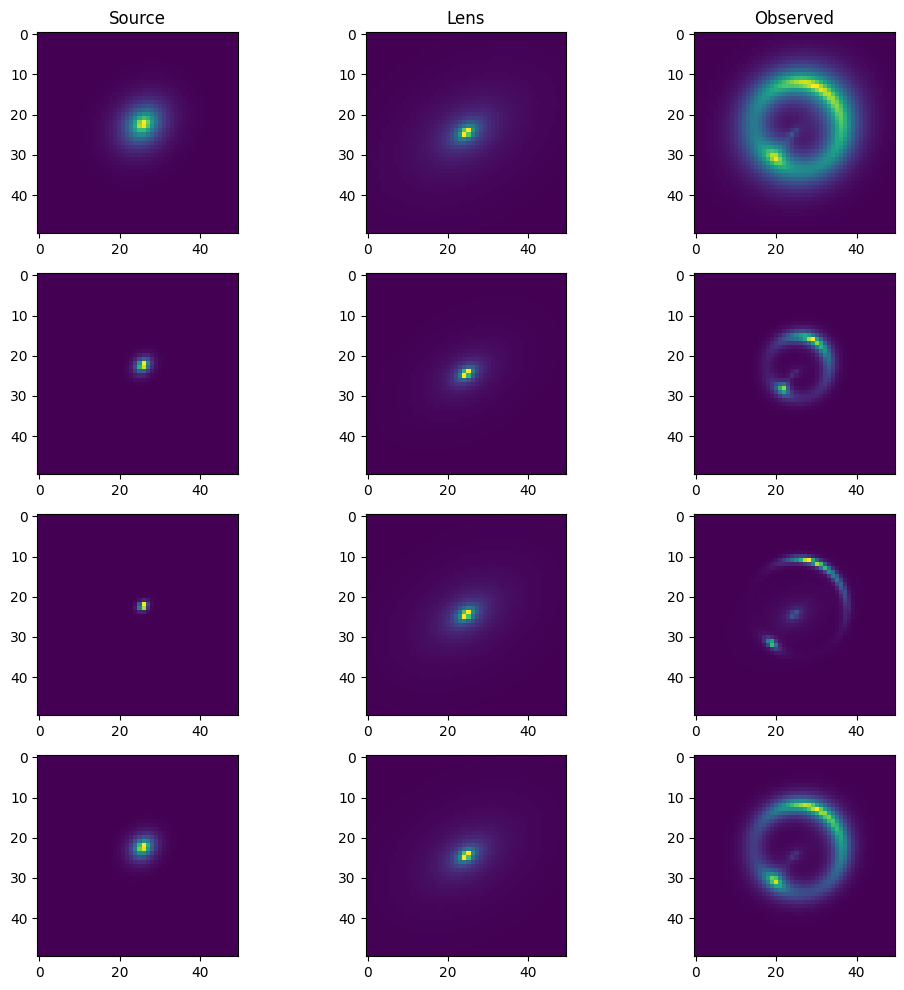

In [39]:
nrows = 4                                                                                                                                                                
ncols = 3                                                                                                                                                                
fig, axs = plt.subplots(nrows, ncols, figsize=(12,12))                                                                                                                   
for i in range(nrows):   
    test_index = int(np.random.uniform(0,100))                                                                                                                                                 
    axs[i,0].imshow(source_galaxies[test_index])
    axs[i,1].imshow(lens_galaxies[test_index])
    axs[i,2].imshow(lensed_galaxies[test_index])
for ax, col in zip(axs[0], ['Source', 'Lens', 'Observed']):
    ax.set_title(col)

Now that we have a set of lensed images, their source galaxies, and their lensing systems, we can define our likelihood function and then run our RIM. We will be using the standard 2D architecture of the RIM.

In [ ]:
def forward_pass():
    
def likelihood_grad():
    y_pred = self.forward(source, kappa, psf)
    0.5 * tf.reduce_sum((y_pred - y_true) ** 2)